# 图像运算-加法运算

图像加法运算一般用于同一个场景，多幅图像的平均效果（注意：这里的平均不是算术平均），以便有效减少叠加的随机噪声。

图像加法运算一般有三种形式：两幅图像相加；图像与常量相加；带有权重值相加。

两幅图像相加：

$$f(D) = f(A) + f(B)$$

图像与常量相加：

$$f(D) = f(A) + C$$

其中，$f(D)$为输出图像，$f(A)$为输入图像，C为常量。当C大于0时，图像变亮；当C小于0时，图像变暗；当C等于0时，图像亮度不变，相当图像复制。

带有权重相加:

$$f(D) = \alpha*f(A) + \beta * f(B)$$

$f(D)$为输出图像，$\alpha$和$\beta$的取值范围为[0,1]，一般情况下，$\beta = 1.0 - \alpha$

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import skimage as sk
import skimage.io as io
import skimage.color as color

In [2]:
A = io.imread('../datas/f2.jpg')
grayA = color.rgb2gray(A)
B = io.imread('../datas/f1.jpg')
grayB = color.rgb2gray(B)

In [3]:
def imadd(A,B):
    Af = np.float32(A)
    Bf = np.float32(B)
    dst = np.zeros_like(Af)
    dst = Af + Bf
    dst = np.clip(dst,0,255)
    return np.uint8(dst)

In [4]:
def imadd_constant(A,C):
    Af = np.float32(A)
    dst = np.zeros_like(Af)
    dst = Af + C
    dst = np.clip(dst,0,255)
    return np.uint8(dst)

In [12]:
def imadd_weighted(A,alpha,B,beta):
    Af = np.float32(A)
    Bf = np.float32(B)
    dst = np.zeros_like(Af)
    dst = alpha * Af + beta * B
    dst = np.clip(dst,0,255)
    return np.uint8(dst)

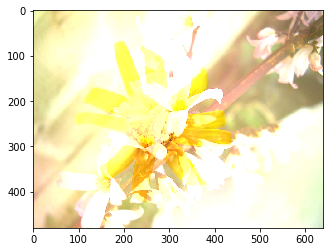

In [6]:
dst = imadd(A,B)
plt.imshow(dst)

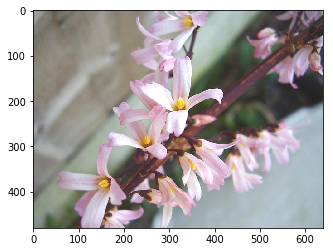

In [7]:
dst = imadd_constant(A,32)
plt.imshow(dst)

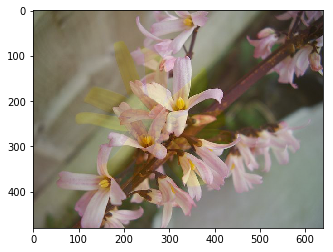

In [13]:
dst = imadd_weighted(A,0.75,B,0.25)
plt.imshow(dst)